In [1]:
from requests import get
url = 'https://www.imdb.com/search/title/?release_date=2017&sort=num_votes,desc&page=2&ref_=adv_nxt'
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [2]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


# Name of the Movie


In [4]:
first_movie= list(movie_containers)[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Act

In [5]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [6]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a>

In [7]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [8]:
first_movie.h3.a

<a href="/title/tt3315342/">Logan</a>

In [9]:
first_name = first_movie.h3.a.text
first_name

'Logan'

# Year of the movie's release

In [10]:
first_year = first_movie.h3.find('span', class_='lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [11]:
first_year=first_year.text
first_year

'(2017)'

# IMDB rating

In [12]:
first_movie.strong

<strong>8.1</strong>

In [13]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

# Metascore

In [15]:
first_mscore=first_movie.find('span', class_='metascore favorable')
first_mscore=int(first_mscore.text)
print(first_mscore)

77


# Number of Votes

In [17]:
first_votes = first_movie.find('span', attrs={'name':'nv'})
first_votes

<span data-value="574571" name="nv">574,571</span>

In [18]:
first_votes['data-value']

'574571'

In [19]:
first_votes=int(first_votes['data-value'])

# The script for a single page

In [22]:
twnthrd_movie_score=movie_containers[22].find('div', class_='ratings-metascore')
type(twnthrd_movie_score)

NoneType

In [24]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
# The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
# The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [26]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
movie        43 non-null object
year         43 non-null object
imdb         43 non-null float64
metascore    43 non-null int64
votes        43 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,574571
1,Thor: Ragnarok,(2017),7.9,74,505482
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,500744
3,Wonder Woman,(2017),7.4,76,498791
4,Dunkirk,(2017),7.9,94,478571
5,Star Wars: Episode VIII - The Last Jedi,(2017),7.1,85,473273
6,Spider-Man: Homecoming,(2017),7.5,73,449300
7,Get Out,(I) (2017),7.7,84,417403
8,Blade Runner 2049,(2017),8.0,81,388736
9,It,(I) (2017),7.4,69,378769


# The script for multiple pages
## Changing the URL’s parameters

In [27]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2019)]

## Controlling the crawl-rate

In [28]:
from time import sleep
from random import randint

In [41]:
from time import time
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
          

Request: 1; Frequency: 0.9999327704808055 requests/s
Request: 2; Frequency: 0.49996477613655366 requests/s
Request: 3; Frequency: 0.4285413899360218 requests/s
Request: 4; Frequency: 0.39997192579866525 requests/s
Request: 5; Frequency: 0.4166374458832747 requests/s


In [42]:
from IPython.core.display import clear_output
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

Request: 1; Frequency: 0.3331988930082478 requests/s
Request: 2; Frequency: 0.3332542898314792 requests/s
Request: 3; Frequency: 0.4284190311308884 requests/s
Request: 4; Frequency: 0.4998400425202673 requests/s
Request: 5; Frequency: 0.5553932281736151 requests/s


In [44]:
from warnings import warn
warn("Warning Simulation")

C:\Users\Jagadeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


## Piecing everything together

In [46]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

C:\Users\Jagadeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Number of requests was greater than expected.


## Examining the scraped data

In [47]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
movie        3276 non-null object
year         3276 non-null object
imdb         3276 non-null float64
metascore    3276 non-null int64
votes        3276 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 128.0+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1229927
1,Memento,(2000),8.4,80,1042612
2,Snatch,(2000),8.3,55,727405
3,Requiem for a Dream,(2000),8.3,68,709032
4,X-Men,(2000),7.4,64,542334
5,Cast Away,(2000),7.8,73,478936
6,American Psycho,(2000),7.6,64,437832
7,Unbreakable,(2000),7.3,62,358749
8,Meet the Parents,(2000),7.0,73,295184
9,Mission: Impossible II,(2000),6.1,59,294237


## Cleaning the scraped data

In [48]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1229927
1,Memento,(2000),8.4,80,1042612
2,Snatch,(2000),8.3,55,727405
3,Requiem for a Dream,(2000),8.3,68,709032
4,X-Men,(2000),7.4,64,542334


In [49]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

In [50]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [51]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int32

In [52]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [53]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1229927,85.0
1,Memento,2000,8.4,80,1042612,84.0
2,Snatch,2000,8.3,55,727405,83.0


In [54]:
movie_ratings.to_csv('movie_ratings.csv')

## Plotting and analyzing the distributions

No handles with labels found to put in legend.


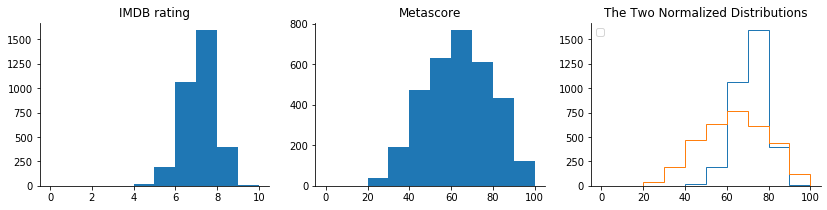

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,3))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()